# TFM - Evaluación de la calidad del dato - EvaluadorTFM.ipynb

### Datos del autor
Notebook elaborado por: **César Fernando Balaguer García** y **Antonio Luís Almira Martínez** en el marco de la tesis de Máster Universitario en **Análisis y Visualización de Datos Masivos / Visual Analytic y Big Data** (2025). <br>
Asesora de tesis: **María Belén Benalcázar Tovar**. <br>
Título: **Marco Metodológico que permita medir la calidad de los datos de un conjunto de datos en formatos planos**.

## 1. Preparación del entorno
En este punto se realiza la carga de las librerías y funciones necesarias para la evaluación de la calidad de los datos, 

### 1.1 Carga las librerías necesarias para la evaluación

In [1]:
#!pip install numpy==1.26.0 --only-binary :all:

In [2]:
## !pip install squarify

In [3]:
#!pip install sweetviz

In [4]:
#!pip install ipywidgets

In [5]:
import importlib
import FuncionesTFM as tfm
from IPython.display import display, clear_output
clear_output(wait=True)

Carga la librería principal para la medición de la calidad de un conjunto de datos (Elaboración propia)

In [6]:
importlib.reload(tfm)

<module 'FuncionesTFM' from 'C:\\Users\\iyari\\Documents\\pp\\TFM\\FuncionesTFM.py'>

## 2. Evaluación del conjunto de datos
En este punto se recorrerá la lista con la configuración realizada en el paso previo y por cada registro existente en la lista se ejecutará el evaluador, para poder lograr esto se va a crear una función por cada dimensión, esta función devolverá el porcentaje de calidad del dato, el resultado de cada una de las dimensiones - datos evaluados se almacenarán en una colección y luego se guardatán en un archivo con formato **CSV** para que pueda ser visualizado desde un archivo Excel o para tener el registro de la evaluación realizada.

### 2.1 Sección de carga y preparación

In [7]:
nombre_archivo, configuraciones, df_data, df_parametro = tfm.CARGA_PARAMETRIA()

CONJUNTO DE DATOS Y NOMBRE DE CAMPOS A EVALUAR

dataset.csv
['CONTENIDO A ANALIZAR', 'INTENSIDAD']

CONFIGURACIÓN REGISTRADA

Encabezado                Dimensión       Validador                                     Umbral Min Umbral Acep
---------------------------------------------------------------------------------------------------------
CONTENIDO A ANALIZAR      Unicidad                                                            98.0       99.0
CONTENIDO A ANALIZAR      Completitud                                                        100.0      100.0
INTENSIDAD                Completitud                                                        100.0      100.0
INTENSIDAD                Consistencia    9                                                   99.0      100.0
INTENSIDAD                Exactitud       1 : 4                                               98.0       99.0
INTENSIDAD                Credibilidad    1, 2, 3, 4                                          98.0       99

### 2.2 Sección principal
En esta sección se recorre la colección de configuración y por cada registro llama a la función correspondiente para la dimensión requerida por validar, finalmente el resultado de cada fila recorrida será almacenada en una colección "**resultado**" donde se tendrán los siguientes datos:
>- Campo: Nombre del campo o columna del dataset que se evalúa
>- Dimensión: Nombre de la dimensión de la calidad o característica del dato que es evaluada
>- Umbral mínimo: Porcentaje mínimo requerido para que el dato pueda considerarse aceptable
>- Umbral aceptable: Límite superior considerado para que un dato pueda ser considerado aceptable
>- Calidad: Resultado cuantitativo de la evaluación de la calidad, el resultado obtenido nos dará una evaluación cualitativa de la evaluación de la calidad bajo el siguiente esquema:
>>- Dato no aceptado: El dato se considera como no aceptado cuando el resultado cuantitativo de la calidad se encuentra por debajo del umbral mínimo de aceptación
>>- Dato aceptable: Se considera un dato aceptable cuando el valor cuantitativo de la calidad se encuentra enmarcado entre el umbral mínimo y el umbral aceptable
>>- Dato con calidad demostrada: Se considera un dato con calidad demostrada cuando el valor cuantitativo de la calidad es mayor o igual al umbral aceptable.

In [8]:
resultado = tfm.EVALUADOR(configuraciones, df_data)

RESULTADOS EVALUACIÓN DE LA CALIDAD
-----------------------------------

MEDICIÓN DE LA CALIDAD POR CAMPO Y DIMENSIÓN

 S    Campo                       Dimension            Calidad        Umbral Min      Umbral Acep    Resultado                                                             
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔴   CONTENIDO A ANALIZAR      | Unicidad        |      91.12% |         98.00% |          99.00% | El porcentaje de calidad se encuentra por debajo del umbral mínimo
🟢   CONTENIDO A ANALIZAR      | Completitud     |     100.00% |        100.00% |         100.00% | El porcentaje de calidad sobre el umbral aceptable
🟢   INTENSIDAD                | Completitud     |     100.00% |        100.00% |         100.00% | El porcentaje de calidad sobre el umbral aceptable
🟢   INTENSIDAD                | Consistencia    |     100.00% |         

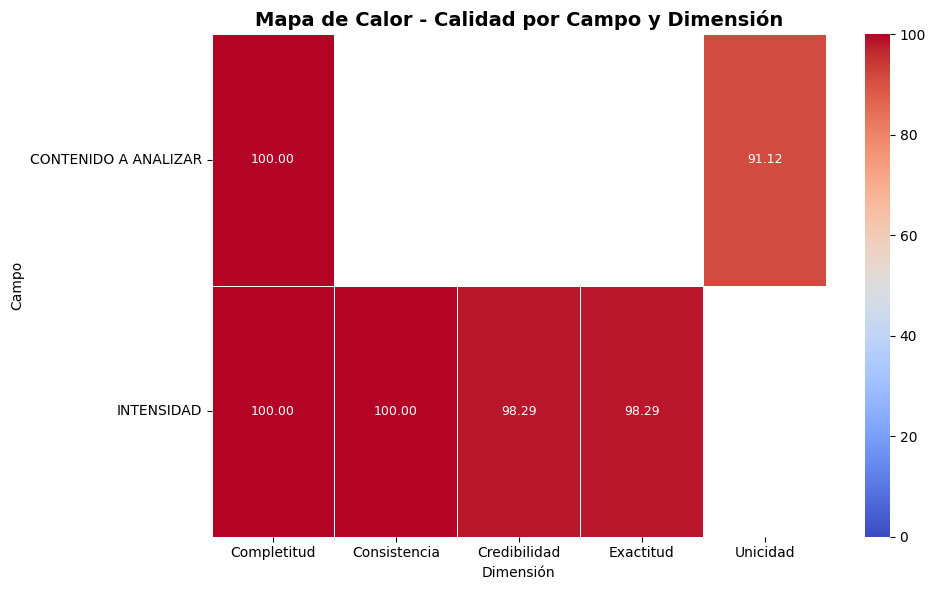

In [9]:
tfm.MAPA_CALOR(resultado)

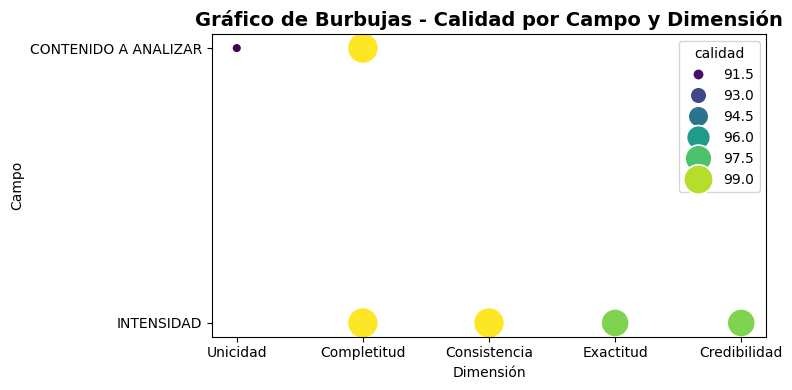

In [10]:
tfm.DIAGRAMA_BURBUJAS(resultado)

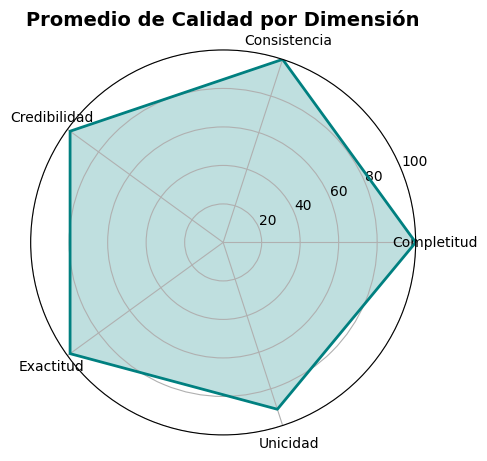

In [11]:
tfm.DIAGRAMA_RADAR(resultado)

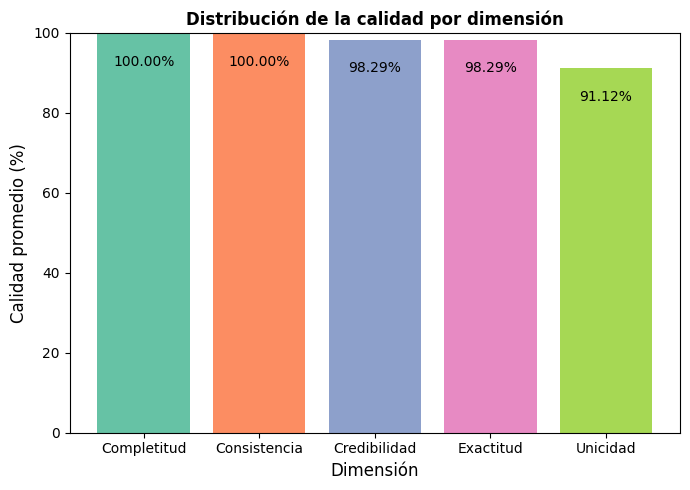

In [12]:
tfm.DIAGRAMA_BARRAS_DIMENSION(resultado)

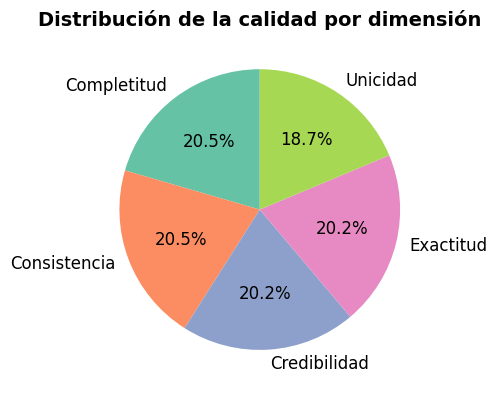

In [13]:
tfm.DIAGRAMA_PIE(resultado)

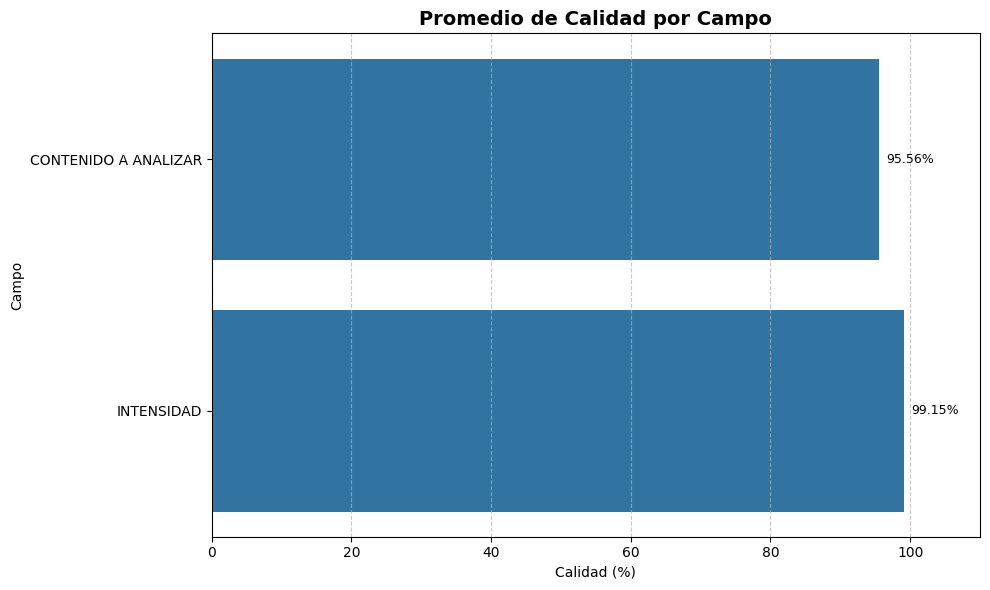

In [14]:
tfm.DIAGRAMA_BARRA_CAMPOS(resultado)

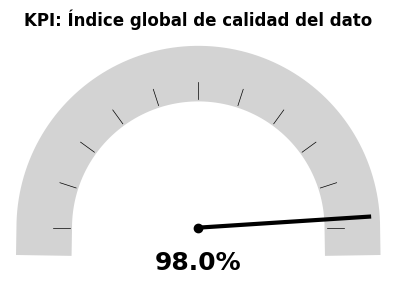

In [15]:
tfm.DIAGRAMA_KPI(resultado)

## 3. Informe final
El evaluador de la calidad de los datos genera un informe final, donde se muestra la siguiente información:
>- Tabla de resultados incluida la semaforización de la calidad de los datos
>- Graficos de apoyo
>>- Diagrama de radar
>>- Diagrama de dona
>>- Diagrama de burbuja
>>
>
Sobre estos diagramas se pueden añadir otros más como soporte a los ya mostrados.

In [16]:
tfm.GENERAR_PDF_COMPLETO(resultado,nombre_archivo)

✅ PDF generado correctamente


In [17]:
tfm.DOSSIER(df_data, nombre_archivo)

✅ Dossier generado correctamente: dataset.html
